In [24]:
# Dependencies
# Note had to run pip install poloygon-api-client
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from datetime import date, datetime, timedelta
import time
import datetime
from dateutil.parser import parse


from config import api_key 
 
#api_key


In [25]:

#Get summary information on each company

count = 1
while count < 4:
          
    if count == 1:
        name = "AAPL"
               
    elif count == 2:
        name = "GOOG"
                
    elif count == 3:
        name = "AMZN"
        
        
    
    
    url= f"https://api.polygon.io/v3/reference/tickers/{name}?apiKey={api_key}"
    #print(url)
    #print(requests.get(url).json())
    
    response = requests.get(url).json() 
            
    print(json.dumps(response,indent=4))
     

    
    #print(response["results"]["description"])
    #print('------------------------------------')
    
    count+=1
    

 
 

{
    "results": {
        "ticker": "AAPL",
        "name": "Apple Inc.",
        "market": "stocks",
        "locale": "us",
        "primary_exchange": "XNAS",
        "type": "CS",
        "active": true,
        "currency_name": "usd",
        "cik": "0000320193",
        "composite_figi": "BBG000B9XRY4",
        "share_class_figi": "BBG001S5N8V8",
        "market_cap": 2464289111680,
        "phone_number": "(408) 996-1010",
        "address": {
            "address1": "ONE APPLE PARK WAY",
            "city": "CUPERTINO",
            "state": "CA",
            "postal_code": "95014"
        },
        "description": "Apple designs a wide variety of consumer electronic devices, including smartphones (iPhone), tablets (iPad), PCs (Mac), smartwatches (Apple Watch), AirPods, and TV boxes (Apple TV), among others. The iPhone makes up the majority of Apple's total revenue. In addition, Apple offers its customers a variety of services such as Apple Music, iCloud, Apple Care, Apple TV+,

In [26]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummyd = pd.DataFrame(columns = ["ticker","c", "t"])
for name in tickers:
    url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/day/2012-01-01/2022-10-22?adjusted=true&sort=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker", "c", "t"]]
    dummyd = pd.concat([dummyd, datadata])
dummyd.columns = ["ticker", "close", "date"]
#print(dummyd) 

In [27]:
dummyd["date"] = pd.to_datetime(dummyd["date"], unit = "ms")
dummyd["dates"] = dummyd["date"].dt.date  
dummyd.drop("date", axis=1,inplace=True)
print(dummyd)
  
 

     ticker     close       dates
0      AAPL   20.6000  2012-11-02
1      AAPL   20.8793  2012-11-05
2      AAPL   20.8161  2012-11-06
3      AAPL   19.9286  2012-11-07
4      AAPL   19.2054  2012-11-08
...     ...       ...         ...
2505   AMZN  113.7900  2022-10-17
2506   AMZN  116.3600  2022-10-18
2507   AMZN  115.0700  2022-10-19
2508   AMZN  115.2500  2022-10-20
2509   AMZN  119.3200  2022-10-21

[7530 rows x 3 columns]


In [28]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummym = pd.DataFrame(columns = ["ticker", "c", "t"])
for name in tickers:
    url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/month/2012-01-01/2022-10-22?adjusted=true&sort=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker","c", "t"]]
    dummym = pd.concat([dummym, datadata])
dummym.columns = ["ticker", "close", "date"]
print(dummym)

    ticker     close           date
0     AAPL   20.9029  1351742400000
1     AAPL   19.0062  1354338000000
2     AAPL   16.2675  1357016400000
3     AAPL   15.7643  1359694800000
4     AAPL   15.8093  1362114000000
..     ...       ...            ...
115   AMZN  106.2100  1654056000000
116   AMZN  134.9500  1656648000000
117   AMZN  126.7700  1659326400000
118   AMZN  113.0000  1662004800000
119   AMZN  102.4400  1664596800000

[360 rows x 3 columns]


In [29]:
dummym["date"] = pd.to_datetime(dummym["date"], unit = "ms")
dummym["dates"] = dummym["date"].dt.date  
dummym.drop("date", axis=1,inplace=True)
print(dummym)

    ticker     close       dates
0     AAPL   20.9029  2012-11-01
1     AAPL   19.0062  2012-12-01
2     AAPL   16.2675  2013-01-01
3     AAPL   15.7643  2013-02-01
4     AAPL   15.8093  2013-03-01
..     ...       ...         ...
115   AMZN  106.2100  2022-06-01
116   AMZN  134.9500  2022-07-01
117   AMZN  126.7700  2022-08-01
118   AMZN  113.0000  2022-09-01
119   AMZN  102.4400  2022-10-01

[360 rows x 3 columns]


In [30]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd20 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=day&adjusted=true&window=20&series_type=close&order=asc&limit=5000&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 20
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd20 = pd.concat([dummysd20, datadata])

print(dummysd20)

     ticker      timestamp       value  window
0      AAPL  1354251600000   20.097715    20.0
1      AAPL  1354510800000   20.114485    20.0
2      AAPL  1354597200000   20.098815    20.0
3      AAPL  1354683600000   20.020140    20.0
4      AAPL  1354770000000   20.000930    20.0
...     ...            ...         ...     ...
2492   AMZN  1666670400000  115.850500    20.0
2493   AMZN  1666756800000  115.733000    20.0
2494   AMZN  1666843200000  115.541000    20.0
2495   AMZN  1666929600000  115.061500    20.0
2496   AMZN  1667188800000  114.389500    20.0

[7491 rows x 4 columns]


In [31]:
dummysd20["timestamp"] = pd.to_datetime(dummysd20["timestamp"], unit = "ms")
dummysd20["dates"] = dummysd20["timestamp"].dt.date  
dummysd20.drop("timestamp", axis=1,inplace=True)
print(dummysd20)

     ticker       value  window       dates
0      AAPL   20.097715    20.0  2012-11-30
1      AAPL   20.114485    20.0  2012-12-03
2      AAPL   20.098815    20.0  2012-12-04
3      AAPL   20.020140    20.0  2012-12-05
4      AAPL   20.000930    20.0  2012-12-06
...     ...         ...     ...         ...
2492   AMZN  115.850500    20.0  2022-10-25
2493   AMZN  115.733000    20.0  2022-10-26
2494   AMZN  115.541000    20.0  2022-10-27
2495   AMZN  115.061500    20.0  2022-10-28
2496   AMZN  114.389500    20.0  2022-10-31

[7491 rows x 4 columns]


In [32]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd50 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=day&adjusted=true&window=50&series_type=close&order=asc&limit=5000&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd50 = pd.concat([dummysd50, datadata])

print(dummysd50)

     ticker      timestamp       value  window
0      AAPL  1358226000000   19.365528    50.0
1      AAPL  1358312400000   19.315020    50.0
2      AAPL  1358398800000   19.256492    50.0
3      AAPL  1358485200000   19.197312    50.0
4      AAPL  1358830800000   19.159290    50.0
...     ...            ...         ...     ...
2462   AMZN  1666670400000  123.601200    50.0
2463   AMZN  1666756800000  123.018800    50.0
2464   AMZN  1666843200000  122.396000    50.0
2465   AMZN  1666929600000  121.618200    50.0
2466   AMZN  1667188800000  120.902400    50.0

[7401 rows x 4 columns]


In [33]:
dummysd50["timestamp"] = pd.to_datetime(dummysd50["timestamp"], unit = "ms")
dummysd50["dates"] = dummysd50["timestamp"].dt.date  
dummysd50.drop("timestamp", axis=1,inplace=True)
print(dummysd50)

     ticker       value  window       dates
0      AAPL   19.365528    50.0  2013-01-15
1      AAPL   19.315020    50.0  2013-01-16
2      AAPL   19.256492    50.0  2013-01-17
3      AAPL   19.197312    50.0  2013-01-18
4      AAPL   19.159290    50.0  2013-01-22
...     ...         ...     ...         ...
2462   AMZN  123.601200    50.0  2022-10-25
2463   AMZN  123.018800    50.0  2022-10-26
2464   AMZN  122.396000    50.0  2022-10-27
2465   AMZN  121.618200    50.0  2022-10-28
2466   AMZN  120.902400    50.0  2022-10-31

[7401 rows x 4 columns]


In [34]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysm20 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=20&series_type=close&order=asc&limit=5000&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysm20 = pd.concat([dummysm20, datadata])


In [35]:
dummysm20["timestamp"] = pd.to_datetime(dummysm20["timestamp"], unit = "ms")
dummysm20["dates"] = dummysm20["timestamp"].dt.date  
dummysm20.drop("timestamp", axis=1,inplace=True)
print(dummysm20)

    ticker       value  window       dates
0     AAPL   18.284855    50.0  2014-06-01
1     AAPL   18.434710    50.0  2014-07-01
2     AAPL   18.765650    50.0  2014-08-01
3     AAPL   19.211650    50.0  2014-09-01
4     AAPL   19.773435    50.0  2014-10-01
..     ...         ...     ...         ...
96    AMZN  156.456975    50.0  2022-06-01
97    AMZN  155.284375    50.0  2022-07-01
98    AMZN  153.480550    50.0  2022-08-01
99    AMZN  151.115050    50.0  2022-09-01
100   AMZN  148.504725    50.0  2022-10-01

[303 rows x 4 columns]


In [36]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysm50 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=50&series_type=close&order=asc&limit=5000&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysm50 = pd.concat([dummysm50, datadata])

print(dummysm50)

   ticker      timestamp       value  window
0    AAPL  1480568400000   23.963668    50.0
1    AAPL  1483246800000   24.152360    50.0
2    AAPL  1485925200000   24.457186    50.0
3    AAPL  1488344400000   24.850136    50.0
4    AAPL  1491019200000   25.253100    50.0
..    ...            ...         ...     ...
66   AMZN  1654056000000  124.352220    50.0
67   AMZN  1656648000000  125.421600    50.0
68   AMZN  1659326400000  126.257200    50.0
69   AMZN  1662004800000  126.739760    50.0
70   AMZN  1664596800000  126.775850    50.0

[213 rows x 4 columns]


In [37]:
dummysm50["timestamp"] = pd.to_datetime(dummysm50["timestamp"], unit = "ms")
dummysm50["dates"] = dummysm50["timestamp"].dt.date  
dummysm50.drop("timestamp", axis=1,inplace=True)
print(dummysm50)

   ticker       value  window       dates
0    AAPL   23.963668    50.0  2016-12-01
1    AAPL   24.152360    50.0  2017-01-01
2    AAPL   24.457186    50.0  2017-02-01
3    AAPL   24.850136    50.0  2017-03-01
4    AAPL   25.253100    50.0  2017-04-01
..    ...         ...     ...         ...
66   AMZN  124.352220    50.0  2022-06-01
67   AMZN  125.421600    50.0  2022-07-01
68   AMZN  126.257200    50.0  2022-08-01
69   AMZN  126.739760    50.0  2022-09-01
70   AMZN  126.775850    50.0  2022-10-01

[213 rows x 4 columns]


In [38]:
# this worked but then issues merging in 50 
#dummyd20 = pd.merge(dummyd, dummysd20, on=["dates","ticker"])

dummychar = dummyd.merge(dummysd20, on=["dates", "ticker"], how = "left")
dummychart = dummychar.merge(dummysd50, on=["dates", "ticker"], how = "left")
dummychart
del dummychart["window_x"]
del dummychart["window_y"]
print(dummychart) 

     ticker     close       dates   value_x   value_y
0      AAPL   20.6000  2012-11-02       NaN       NaN
1      AAPL   20.8793  2012-11-05       NaN       NaN
2      AAPL   20.8161  2012-11-06       NaN       NaN
3      AAPL   19.9286  2012-11-07       NaN       NaN
4      AAPL   19.2054  2012-11-08       NaN       NaN
...     ...       ...         ...       ...       ...
7525   AMZN  113.7900  2022-10-17  115.5985  126.4188
7526   AMZN  116.3600  2022-10-18  115.3070  125.9578
7527   AMZN  115.0700  2022-10-19  115.1335  125.5026
7528   AMZN  115.2500  2022-10-20  115.0305  124.9538
7529   AMZN  119.3200  2022-10-21  115.3075  124.5274

[7530 rows x 5 columns]


In [39]:
# this worked but then issues merging in 50 
#dummyd20 = pd.merge(dummyd, dummysd20, on=["dates","ticker"])

dummycharm = dummym.merge(dummysm20, on=["dates", "ticker"], how = "left")
dummychartm = dummycharm.merge(dummysm50, on=["dates", "ticker"], how = "left")
dummychartm
del dummychartm["window_x"]
del dummychartm["window_y"]
print(dummychartm) 

    ticker     close       dates     value_x    value_y
0     AAPL   20.9029  2012-11-01         NaN        NaN
1     AAPL   19.0062  2012-12-01         NaN        NaN
2     AAPL   16.2675  2013-01-01         NaN        NaN
3     AAPL   15.7643  2013-02-01         NaN        NaN
4     AAPL   15.8093  2013-03-01         NaN        NaN
..     ...       ...         ...         ...        ...
355   AMZN  106.2100  2022-06-01  156.456975  124.35222
356   AMZN  134.9500  2022-07-01  155.284375  125.42160
357   AMZN  126.7700  2022-08-01  153.480550  126.25720
358   AMZN  113.0000  2022-09-01  151.115050  126.73976
359   AMZN  102.4400  2022-10-01  148.504725  126.77585

[360 rows x 5 columns]


In [40]:
aapl_daily = dummychart[dummychart["ticker"] == "AAPL"]
aapl_daily = pd.DataFrame(aapl_daily)
amzn_daily = dummychart[dummychart["ticker"] == "AMZN"]
amzn_daily = pd.DataFrame(amzn_daily)
goog_daily = dummychart[dummychart["ticker"] == "GOOG"]
goog_daily = pd.DataFrame(goog_daily)

#rename columns
aapl_daily.rename(columns = {'close':'AAPL daily'}, inplace = True)
amzn_daily.rename(columns = {'close':'AMZN daily'}, inplace = True)
goog_daily.rename(columns = {'close':'GOOG daily'}, inplace = True)
amzn_daily.head()

,ticker,AMZN daily,dates,value_x,value_y
5020,AMZN,11.6211,2012-11-02,NaN,NaN
5021,AMZN,11.7165,2012-11-05,NaN,NaN
5022,AMZN,11.8780,2012-11-06,NaN,NaN
5023,AMZN,11.6030,2012-11-07,NaN,NaN
5024,AMZN,11.3675,2012-11-08,NaN,NaN


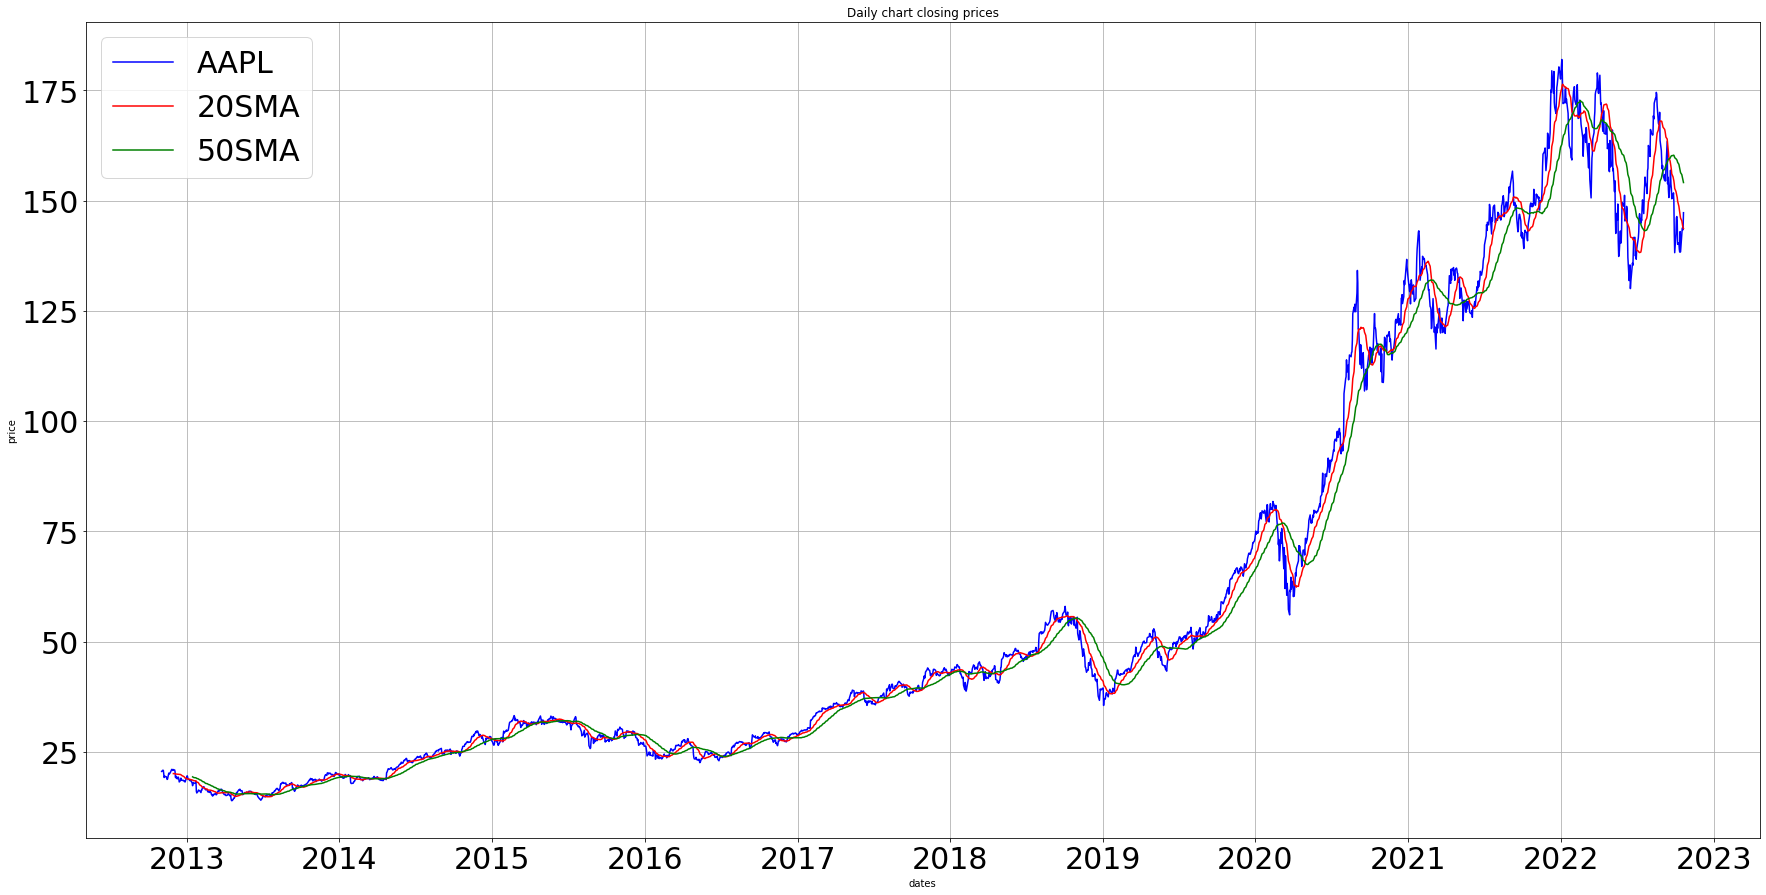

In [41]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

aapl_daily_close, = plt.plot(aapl_daily["dates"], aapl_daily["AAPL daily"], color='blue', label="AAPL")
aapl_daily_20SMA, = plt.plot(aapl_daily["dates"], aapl_daily["value_x"], color='red', label="20SMA")
aapl_daily_50SMA, = plt.plot(aapl_daily["dates"], aapl_daily["value_y"], color='green', label="50SMA")
plt.grid()
plt.xlabel("dates")
plt.ylabel("price")
plt.title("Daily chart closing prices")
plt.legend(fontsize = "30",loc="upper left")

In [42]:
aapl_monthly = dummychartm[dummychartm["ticker"] == "AAPL"]
aapl_monthly = pd.DataFrame(aapl_monthly)
amzn_monthly = dummychartm[dummychartm["ticker"] == "AMZN"]
amzn_monthly = pd.DataFrame(amzn_monthly)
goog_monthly = dummychartm[dummychartm["ticker"] == "GOOG"]
goog_monthly = pd.DataFrame(goog_monthly)

#rename columns
aapl_monthly.rename(columns = {'close':'AAPL monthly'}, inplace = True)
amzn_monthly.rename(columns = {'close':'AMZN monthly'}, inplace = True)
goog_monthly.rename(columns = {'close':'GOOG monthly'}, inplace = True)
amzn_monthly.head()

,ticker,AMZN monthly,dates,value_x,value_y
240,AMZN,12.6025,2012-11-01,NaN,NaN
241,AMZN,12.5435,2012-12-01,NaN,NaN
242,AMZN,13.2750,2013-01-01,NaN,NaN
243,AMZN,13.2135,2013-02-01,NaN,NaN
244,AMZN,13.3245,2013-03-01,NaN,NaN


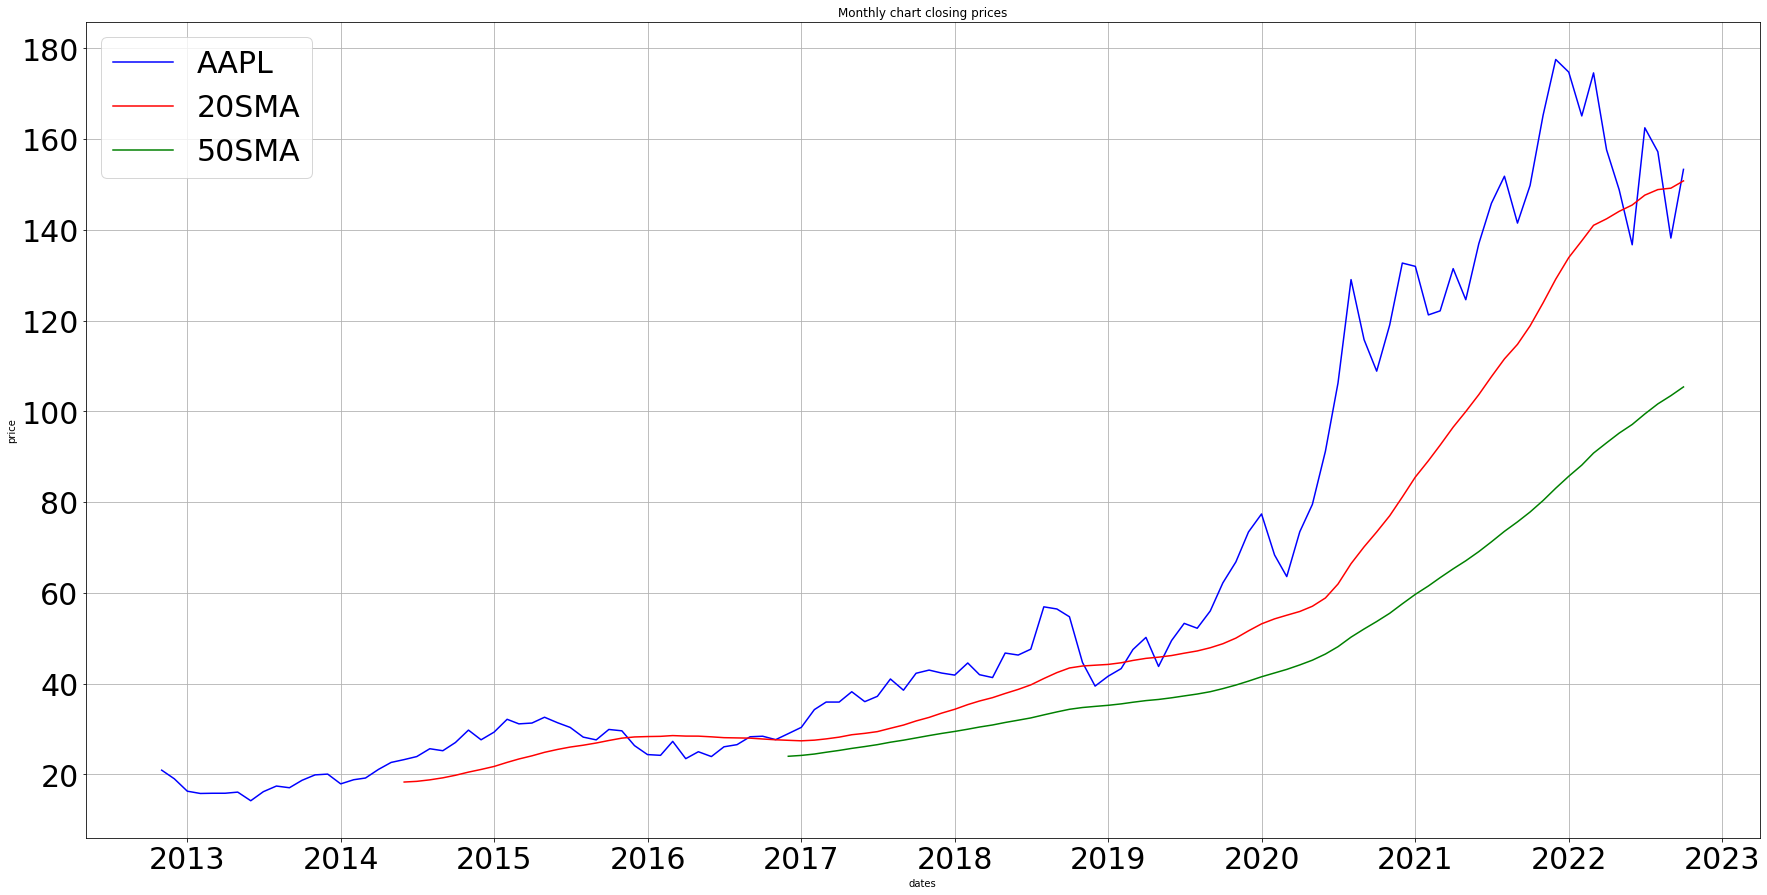

In [23]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

aapl_monthly_close, = plt.plot(aapl_monthly["dates"], aapl_monthly["AAPL monthly"], color='blue', label="AAPL")
aapl_monthly_20SMA, = plt.plot(aapl_monthly["dates"], aapl_monthly["value_x"], color='red', label="20SMA")
aapl_monthly_50SMA, = plt.plot(aapl_monthly["dates"], aapl_monthly["value_y"], color='green', label="50SMA")
plt.grid()
plt.xlabel("dates")
plt.ylabel("price")
plt.title("Monthly chart closing prices")
plt.legend(fontsize = "30",loc="upper left")